In [347]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

# Read Data

In [348]:
#in_dir = '70f80fdf-rounds-10-evidence-1-population-5'
#in_dir = 'abf00068-rounds-10-evidence-4-population-5'
#in_dir = 'd75786f7-data-2018-01-25-big-experiment'
#in_dir = '18a75a2d-data-2018-03-19-big-experiment'
#in_dir = '6b2b35f0-3a65-d0a8-cb49-b2b6e4041562-rounds-10-evidence-1-bit-experiment'

#in_dir = 'd9145d2a-rounds-10-evidence-1-population-5'
#in_dir = 'b7d0390f-rounds-10-evidence-4-population-5'

n_evidence = 4
base_prob = 0.6

data,fails,parts = utils.get_data(in_dir, n_evidence)

In [349]:
len(data)

24

In [350]:
#data = data[data['turn'] <= 3]

In [351]:
#fails = utils.get_evidence_subset(fails, n_evidence)

In [352]:
#data = data[data['net'] > 3]

In [353]:
data['turn'] == 9

12    False
13    False
14    False
15    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
28    False
29    False
30    False
33    False
34    False
37    False
38    False
39    False
42    False
46    False
47    False
Name: turn, dtype: bool

In [354]:
for i in range(1,11):
    print('Participants on turn ' + str(i) + ':', sum(data['turn'] == i)/4)

Participants on turn 1: 1.0
Participants on turn 2: 1.0
Participants on turn 3: 1.0
Participants on turn 4: 1.0
Participants on turn 5: 0.0
Participants on turn 6: 0.0
Participants on turn 7: 0.0
Participants on turn 8: 0.0
Participants on turn 9: 0.0
Participants on turn 10: 0.0


In [355]:
#data = sim_data

# Analyze Evidence

In [356]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []
nets = []
probs = []
posteriors = []

num_turns = max(data['turn'])

for net in sorted(set(data['net'])):
    
    raw_evidence,net_evidence,posterior = utils.get_evidence(fails[net], base_prob)
    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):
        
        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)
    nets += [net] * len(list(mean_pop))
    probs += list(parts[net])
    posteriors += list(posterior[num_turns][t-2])

Net 4
[[ 0.5   0.5   0.25  0.75  0.25  1.    0.    0.75]
 [ 0.5   0.5   0.75  0.75  0.5   0.25  0.25  0.75]
 [ 0.5   0.5   0.5   0.5   0.25  0.25  1.    0.25]]
[[ 0.5   0.5   0.25  0.75  0.25  1.    0.    0.75]
 [ 0.5   0.5   0.5   0.75  0.37  0.62  0.12  0.75]
 [ 0.5   0.5   0.5   0.66  0.33  0.5   0.41  0.58]]
[ 0.  0.  1.  0.  0.  1.  0.  1.]
[ 0.  0.  1.  0.  0.  1.  0.  1.]
[ 1.  1.  1.  1.  1.  0.  1.  1.]
[ 0.  1.  1.  0.  1.  1.  1.  0.]
Final correlation with last 1 evidence 0.174077655956
Final correlation with last 2 evidence -0.258198889747
Final correlation with last 3 evidence -0.692820323028
Net 5
[[ 0.75  0.5   0.25  0.25  0.5   0.75  0.5   0.75]
 [ 0.25  0.25  0.75  0.25  0.5   1.    0.5   1.  ]
 [ 0.5   0.25  0.75  0.5   0.    1.    0.5   0.25]]
[[ 0.75  0.5   0.25  0.25  0.5   0.75  0.5   0.75]
 [ 0.5   0.37  0.5   0.25  0.5   0.87  0.5   0.87]
 [ 0.5   0.33  0.58  0.33  0.33  0.91  0.5   0.66]]
[ 0.  1.  0.  0.  1.  0.  1.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:132: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


In [357]:
colors = np.array(['']*len(probs))
colors[np.array(probs) > 0.5] = 'blue'
colors[np.array(probs) <= 0.5] = 'red'

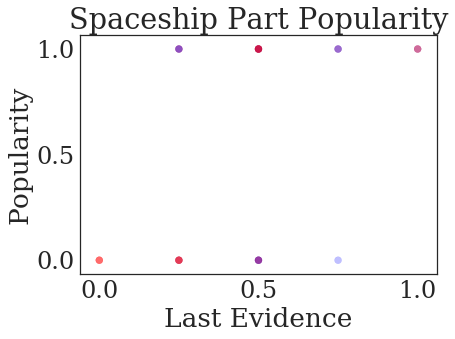

In [358]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [359]:
np.corrcoef(posteriors,final_pops)

array([[ 1.       ,  0.1379233],
       [ 0.1379233,  1.       ]])

In [360]:
np.corrcoef(net_evidences,final_pops)

array([[ 1.        ,  0.19762338],
       [ 0.19762338,  1.        ]])

In [361]:
np.corrcoef(evidences,final_pops)

array([[ 1.       ,  0.4625919],
       [ 0.4625919,  1.       ]])

In [362]:
np.corrcoef([x for i in range(4,8) for x in parts[i]],final_pops)

array([[ 1.     ,  0.03253],
       [ 0.03253,  1.     ]])

In [363]:
np.corrcoef([x for net in range(4,8) for x in utils.get_evidence(fails[net], base_prob)[1][1][num_turns-2] ],final_pops)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:132: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


array([[ 1.       ,  0.4625919],
       [ 0.4625919,  1.       ]])

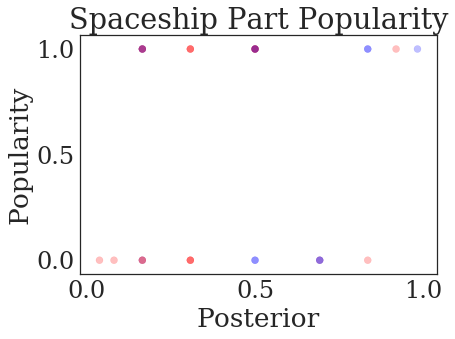

In [364]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(posteriors,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Posterior')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

(-0.066259813769006359, 1.0662598137690067)

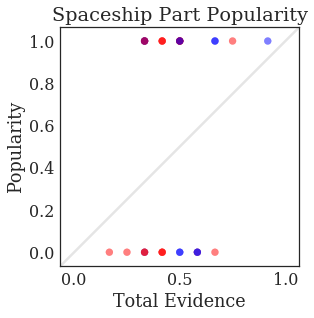

In [365]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots()

plt.scatter(net_evidences,final_pops,s=50,alpha=0.5,c=colors)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
plt.savefig('pop-evidence.jpg', bbox_inches = 'tight')


lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes                                                                               
              np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes                                                                         
              ]

ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


In [366]:
pd.DataFrame({'evidence':net_evidences,'popularity':final_pops, 'game':nets}).to_csv('evidence-pops.csv')

In [367]:
os.system('Rscript analyze.R > tmp')
with open('tmp') as f:
    for l in f.readlines():
        print(l)

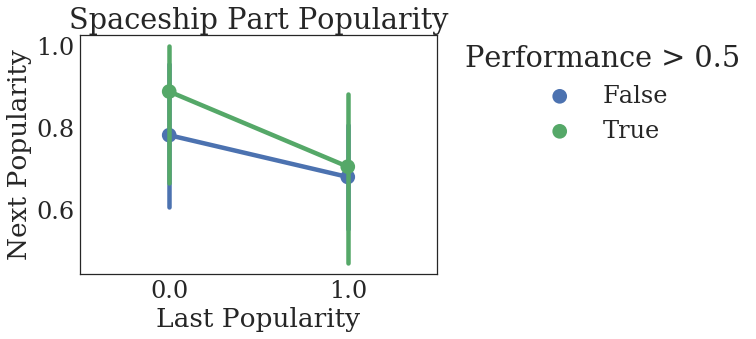

In [368]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [369]:
np.array(pops)[np.array(last_pops) == 0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

# Analyze Reward

In [370]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,parts,net,t)]

rewards = np.transpose(np.array(rewards))

In [371]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.025
Turn 2: -0.0125
Turn 3: -0.025
Turn 4: -0.0125


In [372]:
rewards

array([[-0.0375, -0.0125, -0.0125, -0.0375],
       [-0.0375,  0.025 ,  0.    , -0.0375],
       [-0.0625,  0.025 ,  0.    , -0.0625],
       [-0.0625,  0.0125,  0.0125, -0.0125]])

In [373]:
all_rewards = pd.DataFrame([[i,j,r] for i in range(len(rewards)) for j,r in enumerate(rewards[i])])
all_rewards.columns = ['turn','net','reward']

In [374]:
[sum(parts[i] == base_prob) for i in parts]

[3, 5, 1, 4, 5, 4, 2, 1]

In [375]:
all_rewards.groupby(['turn','net']).mean()

reward
turn net        
0    0   -0.0375
     1   -0.0125
     2   -0.0125
     3   -0.0375
1    0   -0.0375
     1    0.0250
     2    0.0000
     3   -0.0375
2    0   -0.0625
     1    0.0250
     2    0.0000
     3   -0.0625
3    0   -0.0625
     1    0.0125
     2    0.0125
     3   -0.0125

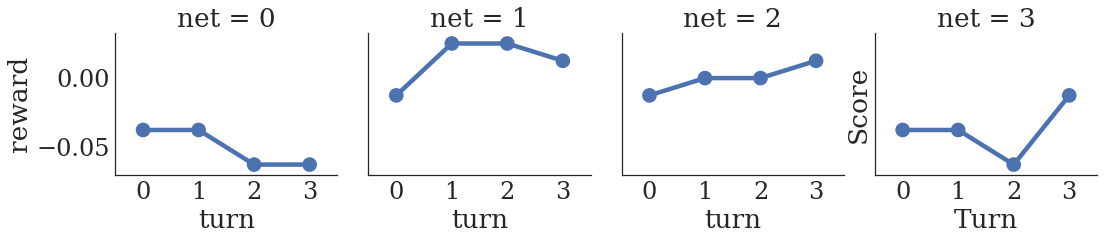

In [376]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn','reward',col='net',data=all_rewards)
plt.xlabel('Turn')
plt.ylabel('Score')
plt.savefig('score-over-time.jpg', bbox_inches = 'tight')


In [377]:
print(stats.linregress(all_rewards['turn'], all_rewards['reward']))

LinregressResult(slope=0.0024999999999999996, intercept=-0.022499999999999996, rvalue=0.095346258924559224, pvalue=0.72540108588106011, stderr=0.0069757232087945022)


In [378]:
all_rewards.to_csv('all_rewards.csv')

In [379]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            net += [row['net']]
            item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

----
6 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail' 'fail' 'success' 'fail']
 ['success' 'success' 'success' 'fail']
 ['success' 'fail' 'success' 'success']
 ['fail' 'fail' 'success' 'fail']
 ['success' 'success' 'fail' 'success']
 ['fail' 'fail' 'success' 'success']
 ['success' 'fail' 'fail' 'success']
 ['fail' 'fail' 'fail' 'success']]
[1, 0, 0, 1, 0, 0, 0, 1]
----
5 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail' 'fail' 'success' 'fail']
 ['success' 'success' 'success' 'fail']
 ['success' 'fail' 'success' 'success']
 ['fail' 'fail' 'success' 'success']
 ['fail' 'fail' 'fail' 'success']
 ['success' 'success' 'fail' 'success']
 ['fail' 'success' 'success' 'success']
 ['fail' 'fail' 'fail' 'success']]
[0, 1, 0, 0, 1, 0, 1, 0]
----
6 2
[['success'], ['0'], ['0'], ['fail'], ['0'], ['0'], ['0'], ['fail']]
[['success' 'success' 'fail' 'fail']
 ['success' 'fail' 'success' 'success']
 ['fail' 'success' 'fail' 'fail']
 ['fail' 'fail' 'fail' 'success'

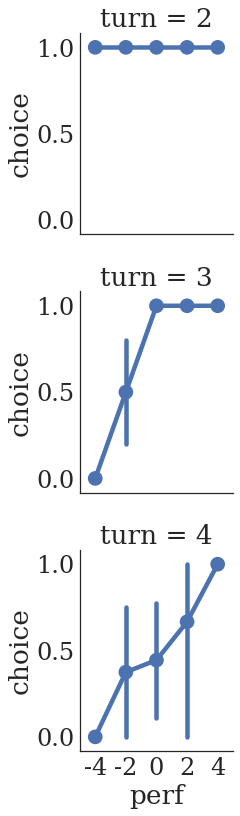

In [380]:
sns.factorplot('perf', 'choice', row = 'turn', data = indiv_choices[seen])


In [381]:
agg = indiv_choices[seen].groupby(['perf','turn','item','net']).mean()
agg

choice  seen
perf turn item net              
-4   2    3    7         1  True
          5    7         1  True
     3    2    7         0  True
     4    3    7         0  True
          4    5         0  True
          5    6         0  True
-2   2    2    4         1  True
          3    6         1  True
     3    0    5         0  True
          1    5         1  True
               6         1  True
          3    5         0  True
               6         1  True
          4    6         1  True
          5    4         0  True
          6    7         0  True
          7    6         1  True
               7         0  True
     4    1    5         0  True
               7         0  True
          2    6         0  True
          4    4         1  True
               6         1  True
               7         0  True
          7    4         0  True
               5         1  True
 0   2    0    6         1  True
          1    5         1  True
          4    5         1  True
          6    5         1  True
...                    ...   ...
     3    3    7         1  True
          4    5         1  True
               7         1  True
          5    6         1  True
               7         1  True
          6    5         1  True
               6         1  True
     4    0    4         0  True
          1    4         1  True
               6         0  True
          2    4         1  True
          3    4         0  True
          5    7         1  True
          6    5         1  True
               6         0  True
          7    6         0  True
 2   2    7    4         1  True
     3    0    6         1  True
          2    4         1  True
               5         1  True
          7    4         1  True
     4    0    6         1  True
          2    5         0  True
          3    6         1  True
 4   2    5    4         1  True
     3    5    5         1  True
          7    5         1  True
     4    0    7         1  True
          5    5         1  True
          6    4         1  True

[64 rows x 2 columns]

In [382]:
np.mean(agg.loc[[-4,-2],:,:,:]['choice'] == 0)

0.53846153846153844

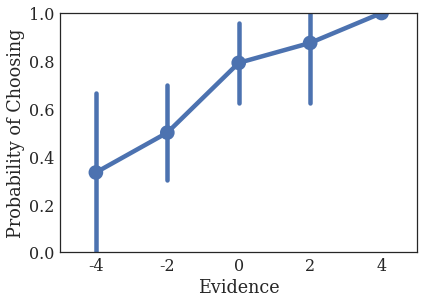

In [383]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)
plt.xlabel('Evidence')
plt.ylabel('Probability of Choosing')
plt.savefig('response-curve.jpg', bbox_inches = 'tight')

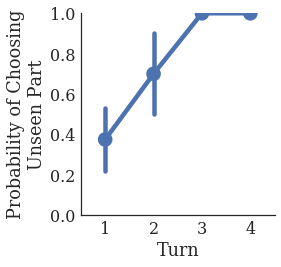

In [384]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn', 'choice', data = indiv_choices[~np.array(seen)])
plt.xlabel('Turn')
plt.ylabel('Probability of Choosing\nUnseen Part')
plt.ylim(0,1)
plt.savefig('unseen-parts.jpg', bbox_inches = 'tight')

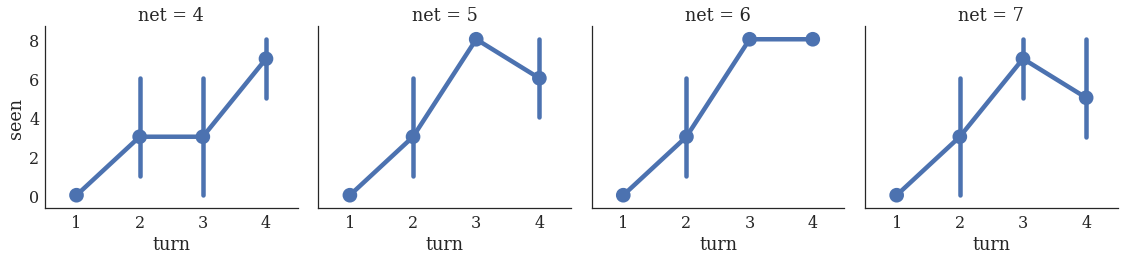

In [385]:
sns.factorplot('turn', 'seen', col = 'net', data = indiv_choices, estimator = sum)

In [386]:
num_turns = max(data['turn'])
num_agents = int(sum(data['turn'] == max(data['turn'])) / len(set(nets)))
num_actions = 8
actions = []

for n in set(nets):
        
    for t in range(num_turns):
        
        this_actions = []
    
        for i in range(num_agents):
            
            action = [n,t,i,[]]
        
            for j in range(num_actions):
                
                if t > 0:
                    viewed_fails = last_actions[np.random.choice(num_agents)]
                    
                if t == 0:
                    choice = np.random.random() < 0.5
                elif not viewed_fails[j]:
                    choice = np.random.random() < 0.5
                else:
                    signal = np.mean(fails[n][t][j] == 'success')
                    if signal == 1.0:
                        choice = np.random.random() < 0.8
                    elif signal == 0.75:
                        choice = np.random.random() < 0.75
                    elif signal == 0.5:
                        choice = np.random.random() < 0.5
                    elif signal == 0.25:
                        choice = np.random.random() < 0.25
                    elif signal == 0.0:
                        choice = np.random.random() < 0.2
                    else:
                        assert False
                    
                action[-1] += [choice]
                
            this_actions += [action[-1]]
            actions += [action]
            
        last_actions = this_actions
            

In [387]:
sim_data = pd.DataFrame(actions)
sim_data.columns = ['net','turn','agent','action']

In [388]:
len(last_actions)

1

In [389]:
sim_rewards = []

for net in sorted(set(data['net'])):
    
    sim_rewards += [[]]
    for t in range(num_turns):
        sim_rewards[-1] += [utils.get_reward(sim_data,parts,net,t)]

sim_rewards = np.transpose(np.array(sim_rewards))

In [390]:
sim_rewards

array([[-0.05  ,  0.    ,  0.    , -0.025 ],
       [-0.0375, -0.0125, -0.025 , -0.0375],
       [-0.0375,  0.0125,  0.025 , -0.025 ],
       [-0.0375,  0.    ,  0.0125, -0.0125]])

In [391]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(sim_rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.01875
Turn 2: -0.028125
Turn 3: -0.00625
Turn 4: -0.009375


In [392]:
all_sim_rewards = pd.DataFrame([[i,j,r] for i in range(len(sim_rewards)) for j,r in enumerate(sim_rewards[i])])
all_sim_rewards.columns = ['turn','net','reward']

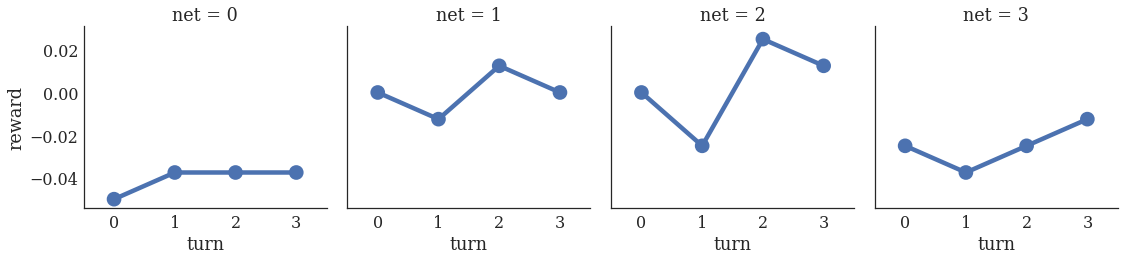

In [393]:
sns.factorplot('turn','reward',col='net',data=all_sim_rewards)

In [394]:
print(stats.linregress(all_sim_rewards['turn'], all_sim_rewards['reward']))

LinregressResult(slope=0.0049999999999999992, intercept=-0.023124999999999996, rvalue=0.2609312292213769, pvalue=0.3290092246582742, stderr=0.0049438814999668308)
